In [1]:
import pandas as pd
import numpy as np
import math
import itertools
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('data/crawler/unified-events-statistics.csv')
def qtd_eventos(integer):
    return 45 - integer

qtd_eventos = list(map(qtd_eventos, df.isnull().sum(axis=1).tolist()))
df['qtd_eventos'] = qtd_eventos

In [3]:
df = df.drop(['golId','game','event4','event5','event6','event7','event8','event9','event10','event11','event12','event13','event14','event15','event16','event17','event18','event19','event20','event21','event22','event23','event24','event25','event26','event27','event28','event29','event30','event31','event32','event33','event34','event35','event36','event37','event38','event39','event40','event41','event42','event43','event44','event45'],axis=1)
y = df.result
df = df.replace(['BLUE: first_blood',
    'BLUE: dragon',
    'BLUE: herald',
    'BLUE: first_tower_top',
    'BLUE: first_tower_mid',
    'BLUE: first_tower_bot',
    'BLUE: second_tower_top',
    'BLUE: second_tower_mid',
    'BLUE: second_tower_bot',
    'BLUE: third_tower_top',
    'BLUE: third_tower_mid',
    'BLUE: third_tower_bot',
    'BLUE: inhibitor_top',
    'BLUE: inhibitor_mid',
    'BLUE: inhibitor_bot',
    'BLUE: baron',
    'BLUE: elder_dragon',
    'BLUE: nexus_tower',
    'BLUE: nexus',
    'RED: first_blood',
    'RED: dragon',
    'RED: herald',
    'RED: first_tower_top',
    'RED: first_tower_mid',
    'RED: first_tower_bot',
    'RED: second_tower_top',
    'RED: second_tower_mid',
    'RED: second_tower_bot',
    'RED: third_tower_top',
    'RED: third_tower_mid',
    'RED: third_tower_bot',
    'RED: inhibitor_top',
    'RED: inhibitor_mid',
    'RED: inhibitor_bot',
    'RED: baron',
    'RED: elder_dragon',
    'RED: nexus_tower',
    'RED: nexus'], range(38))
x = df.drop(['result'],axis=1)
df.head()

,event1,event2,event3,blueTopGP,blueTopWR,blueTopKDA,blueJungleGP,blueJungleWR,blueJungleKDA,blueMidGP,...,redMidWR,redMidKDA,redAdcGP,redAdcWR,redAdcKDA,redSupportGP,redSupportWR,redSupportKDA,result,qtd_eventos
0,19,1,2,1,1.00,2.0,1,1.0,2.3,1,...,0.71,4.2,1,0.00,2.5,1,1.00,7.0,0,28
1,19,21,1,5,0.60,5.6,2,0.0,1.1,9,...,0.38,3.2,21,0.57,3.3,6,0.83,4.1,1,20
2,19,2,20,0,0.00,0.0,1,1.0,3.3,0,...,0.80,4.8,1,0.00,0.8,5,0.60,3.2,1,31
3,20,0,21,23,0.61,3.6,5,0.2,1.6,8,...,0.67,3.9,34,0.74,7.3,2,0.00,2.0,1,25
4,19,1,2,3,1.00,9.8,2,1.0,7.0,1,...,0.40,2.4,2,1.00,24.0,1,1.00,6.0,1,23


In [4]:
df.describe()

,event1,event2,event3,blueTopGP,blueTopWR,blueTopKDA,blueJungleGP,blueJungleWR,blueJungleKDA,blueMidGP,...,redMidWR,redMidKDA,redAdcGP,redAdcWR,redAdcKDA,redSupportGP,redSupportWR,redSupportKDA,result,qtd_eventos
count,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,...,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000
mean,10.077096,11.058882,10.868513,7.860529,0.435973,2.920160,7.245758,0.442106,3.470534,7.095060,...,0.416165,3.929067,8.863772,0.438510,4.393313,10.268713,0.445232,3.481811,0.488273,24.062375
std,9.525073,9.470089,9.452041,9.908353,0.333383,2.772244,9.307102,0.328377,3.150188,9.851515,...,0.344831,4.248899,10.769190,0.320596,4.250436,12.247383,0.319677,3.912970,0.499925,3.905178
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,0.000000,1.000000,2.000000,1.000000,0.000000,1.300000,1.000000,0.000000,1.600000,1.000000,...,0.000000,1.200000,1.000000,0.000000,2.075000,1.000000,0.000000,1.600000,0.000000,21.000000
50%,19.000000,19.000000,4.000000,4.000000,0.500000,2.700000,4.000000,0.500000,3.200000,4.000000,...,0.500000,3.400000,5.000000,0.500000,3.800000,6.000000,0.500000,2.800000,0.000000,24.000000
75%,19.000000,20.000000,21.000000,11.000000,0.670000,3.800000,10.000000,0.670000,4.600000,9.000000,...,0.670000,5.100000,13.000000,0.670000,5.600000,16.000000,0.670000,4.200000,1.000000,26.000000
max,21.000000,22.000000,24.000000,76.000000,1.000000,38.000000,95.000000,1.000000,34.000000,112.000000,...,1.000000,60.000000,129.000000,1.000000,53.000000,94.000000,1.000000,50.000000,1.000000,41.000000


# of blue team victory:  2051
# of red team victory:  1957


c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



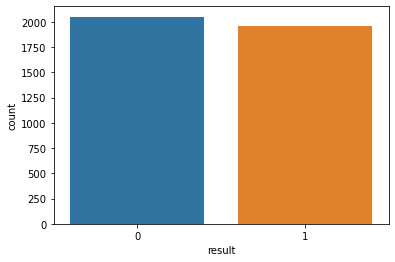

In [5]:
ax = sns.countplot(y)
B, M = y.value_counts()
print('# of blue team victory: ', B)
print('# of red team victory: ', M)

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



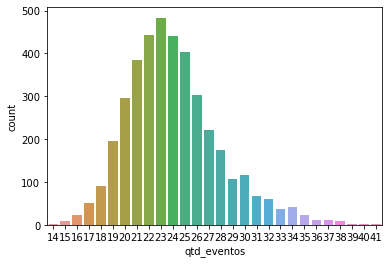

In [6]:
ax = sns.countplot(df['qtd_eventos'])

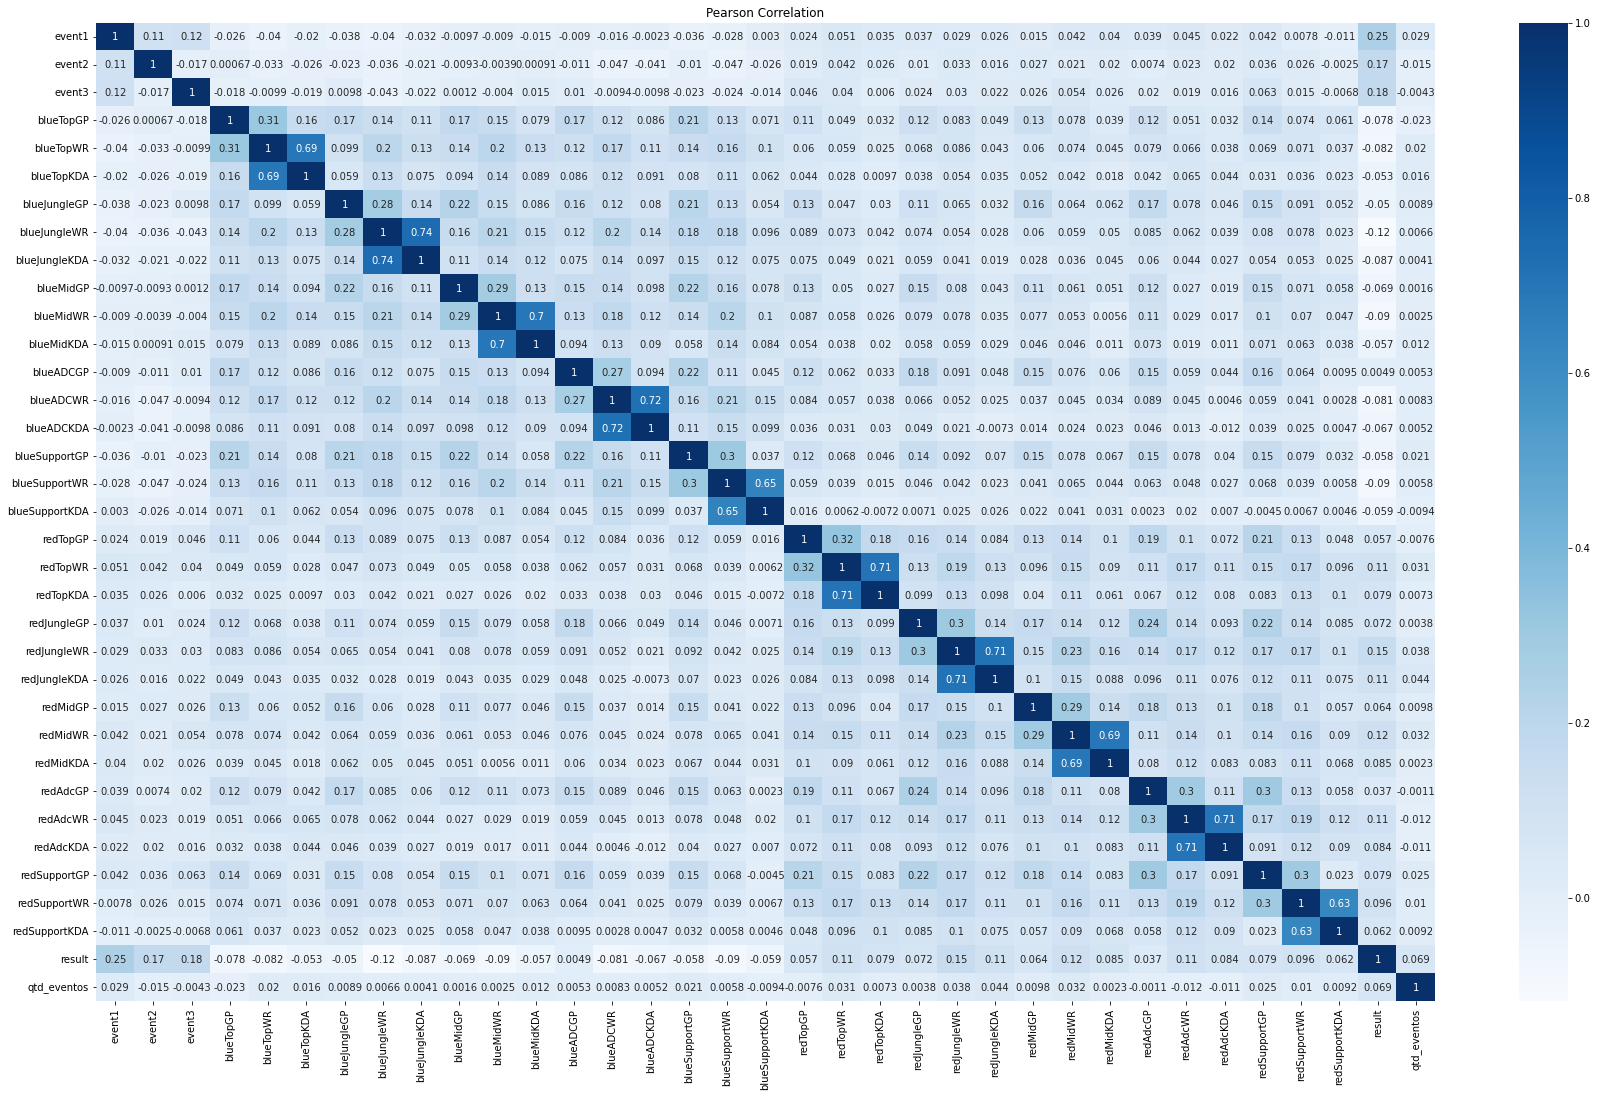

In [7]:
plt.figure(figsize = (30,18))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')
plt.title("Pearson Correlation")
plt.show()

array([[<AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>],
       [<AxesSubplot:title={'center':'19'}>,
        <AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>,
        <AxesSubplot:title={'center':'22'}>,
        <AxesSubplot:title={'center':'23'}>],
       [<AxesSubplot:title={'center':'24'}>,
        <AxesSubplot:title={'center':'25'}>,
        <AxesSubplot:title={'center':'26'}>,
        <AxesSubplot:title={'center':'27'}>,
        <AxesSubplot:title={'center':'28'}>],
       [<AxesSubplot:title={'center':'29'}>,
        <AxesSubplot:title={'center':'30'}>,
        <AxesSubplot:title={'center':'31'}>,
        <AxesSubplot:title={'center':'32'}>,
        <AxesSubplot:title={'center':'33'}>],
       [<AxesSubplot:title={'center':'34'}>,
        <AxesSubplot:title={'center':'35'}>,
      

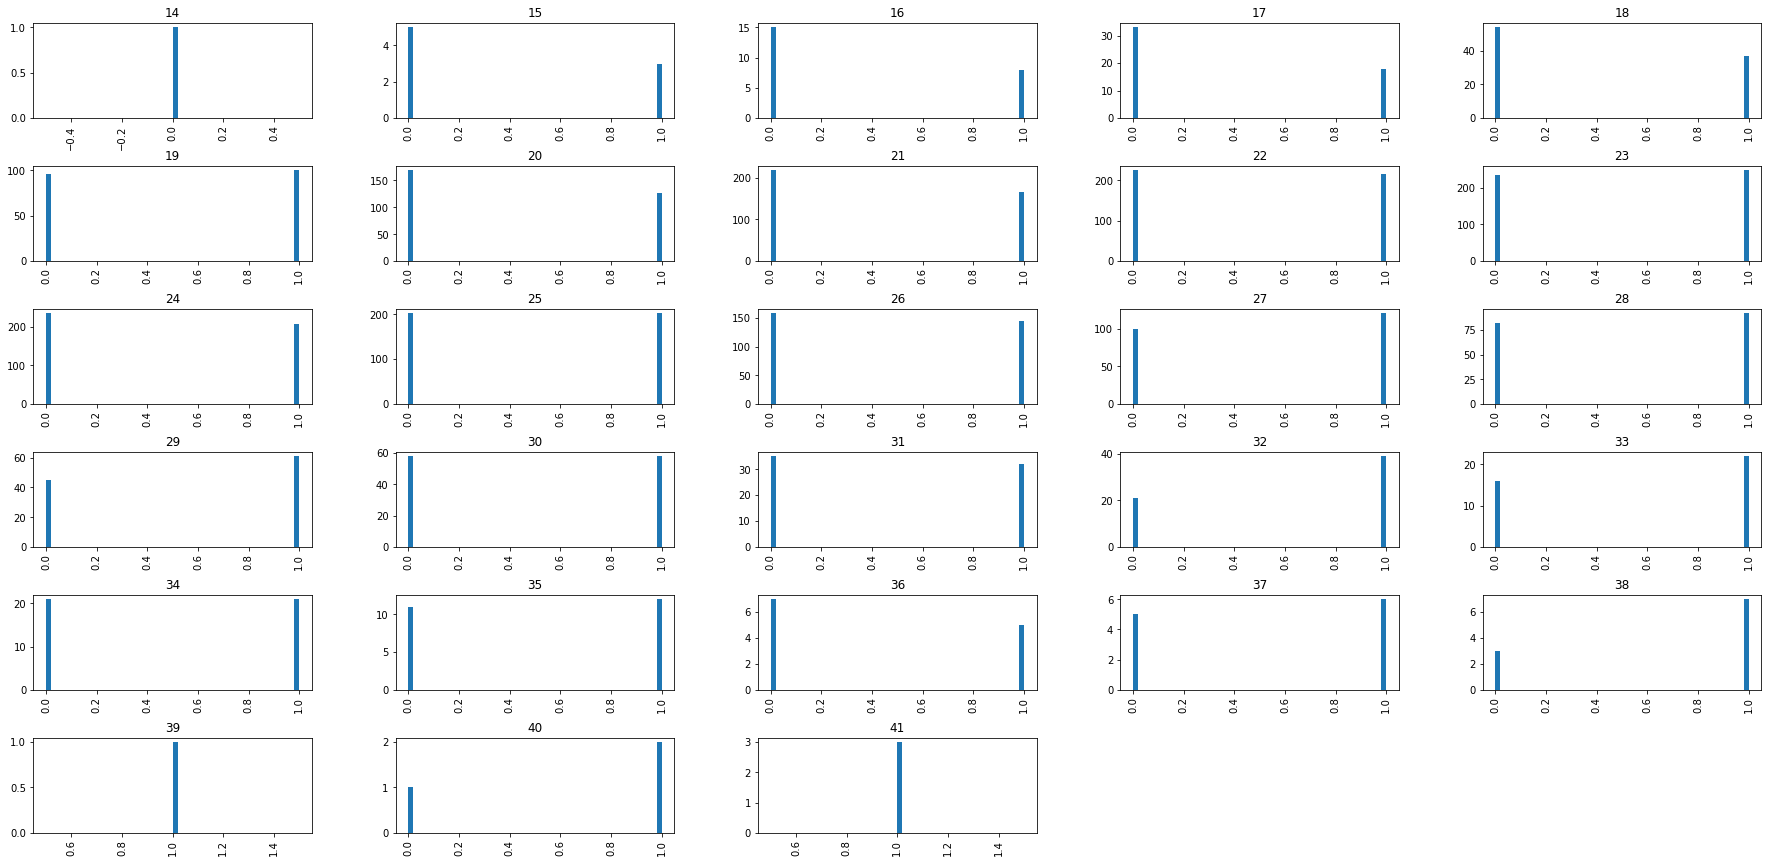

In [8]:
df.hist(column='result', by='qtd_eventos', bins=50,figsize=(30,15))

In [9]:
features = ['event1','event2','event3','blueTopGP','blueTopWR','blueTopKDA','blueJungleGP','blueJungleWR','blueJungleKDA','blueMidGP','blueMidWR','blueMidKDA','blueADCGP','blueADCWR','blueADCKDA','blueSupportGP','blueSupportWR','blueSupportKDA','redTopGP','redTopWR','redTopKDA','redJungleGP','redJungleWR','redJungleKDA','redMidGP','redMidWR','redMidKDA','redAdcGP','redAdcWR','redAdcKDA','redSupportGP','redSupportWR','redSupportKDA']
X = df[features]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df['result'])
fig.show()

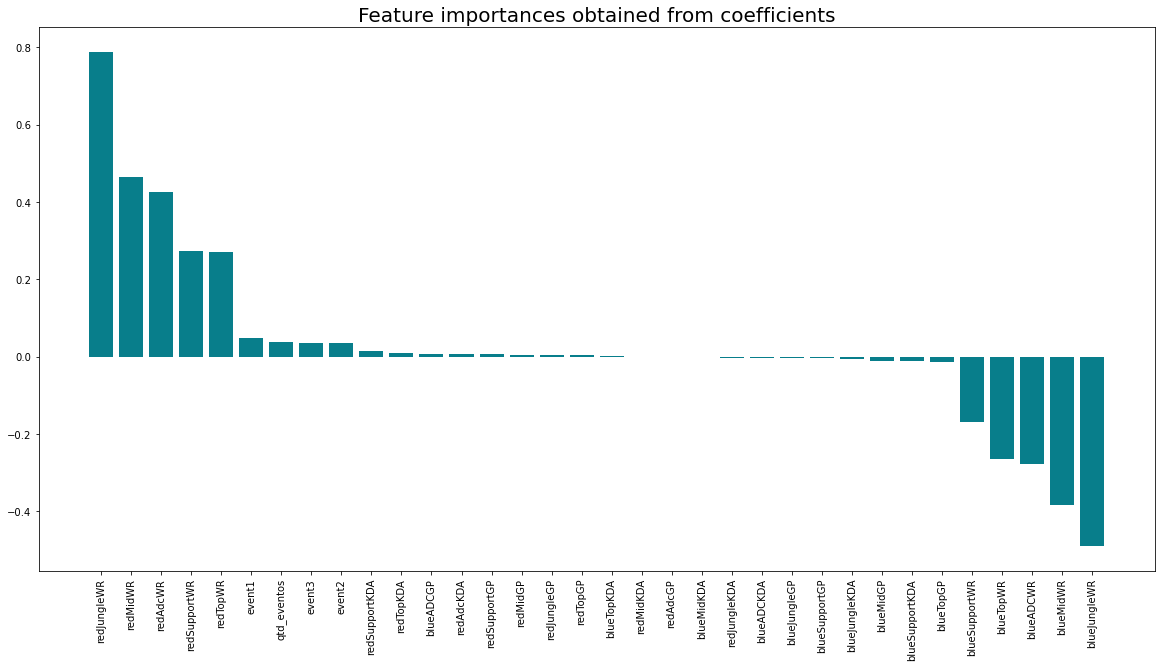

In [10]:
# Fonte dos plots abaixo: https://betterdatascience.com/feature-importance-python/
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(x, y)
importances = pd.DataFrame(data={
    'Attribute': x.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.rcParams["figure.figsize"] = (20, 10)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

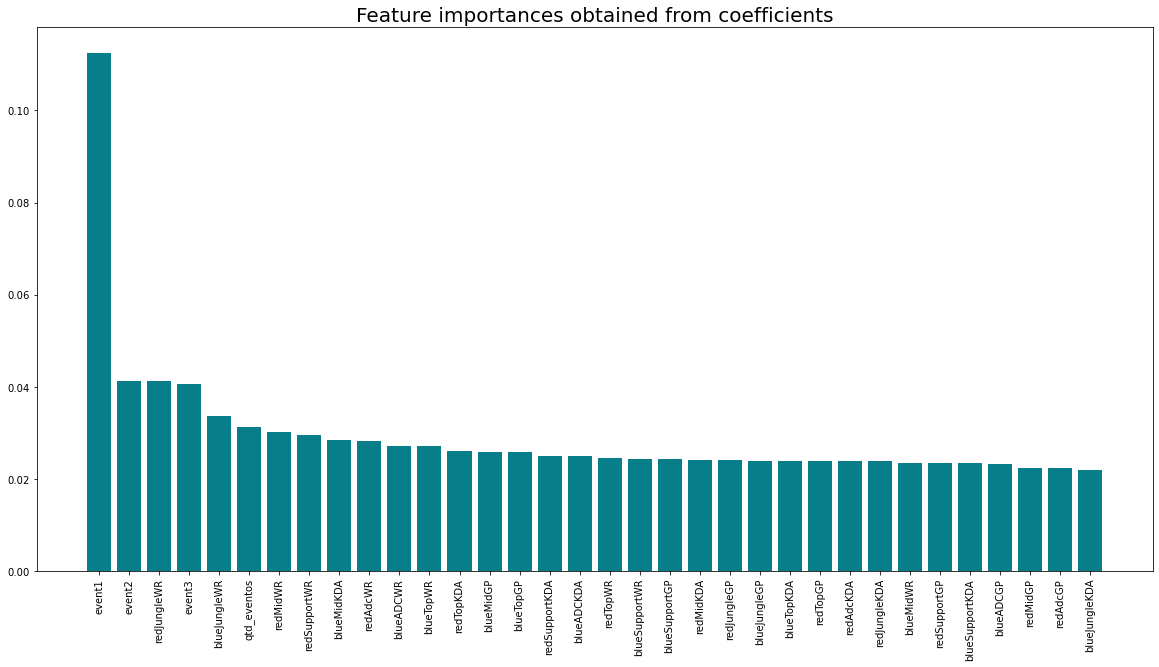

In [11]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x, y)
importances = pd.DataFrame(data={
    'Attribute': x.columns,
    'Importance': model.feature_importances_
})

importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

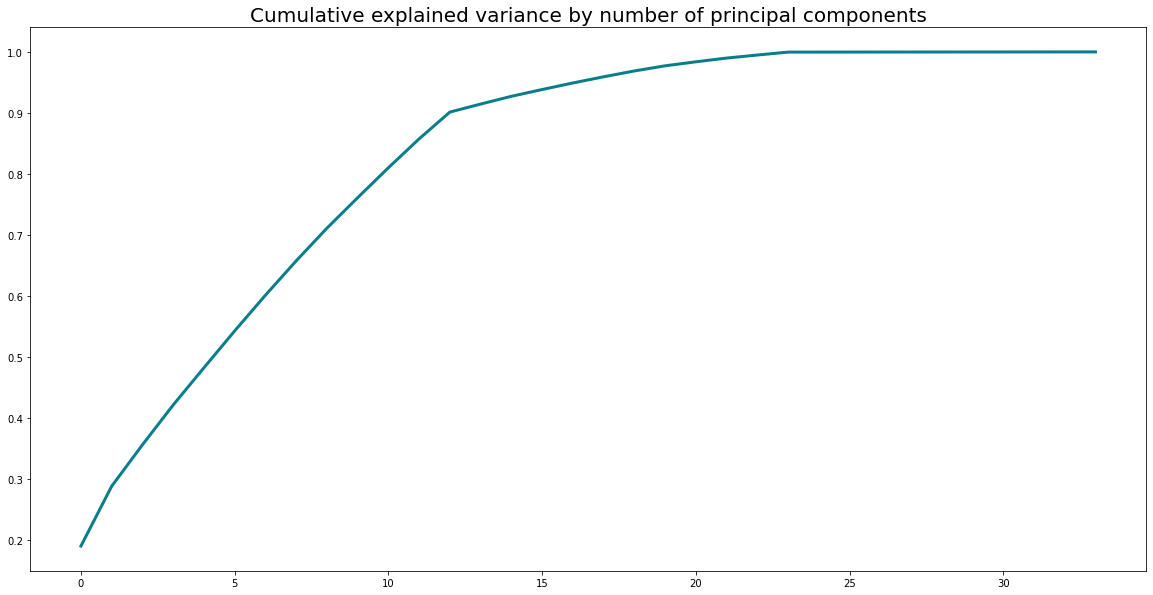

In [12]:
from sklearn.decomposition import PCA

pca = PCA().fit(x)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

In [13]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(x.columns) + 1)],
    index=x.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34
event1,0.132652,2.378596,-5.423666,4.412364,-0.395142,0.255511,-0.670228,-2.037263,-0.589935,4.714656,...,-0.000045,-0.000104,0.000036,0.000186,-0.000022,0.000121,0.000091,1.999179e-06,0.000092,0.000020
event2,0.150940,1.253549,-3.985659,2.416790,2.266191,-6.337564,0.393167,-0.389108,1.131806,-4.031929,...,-0.000027,-0.000248,0.000111,0.000100,0.000039,0.000172,-0.000039,1.234465e-05,-0.000042,-0.000014
event3,0.410323,1.960871,-3.002744,2.874800,-4.288187,4.840623,-1.070379,1.292445,-1.343498,-3.799560,...,0.000064,-0.000259,-0.000044,0.000102,0.000191,-0.000063,-0.000024,-6.211139e-07,-0.000006,-0.000162
blueTopGP,4.192095,-1.687229,2.488626,1.857780,-1.795325,-3.176447,-1.173142,-0.914779,-7.197131,0.318511,...,0.000819,0.000475,0.000074,-0.000630,0.000837,-0.000161,-0.000332,1.462846e-04,0.000224,-0.000151
blueTopWR,0.074505,-0.034495,0.037608,0.018021,-0.023638,-0.023503,-0.013534,-0.016408,-0.056127,0.003960,...,-0.095450,-0.039581,-0.045868,0.116963,-0.128446,0.040991,0.057542,-2.174647e-02,-0.042524,0.026214


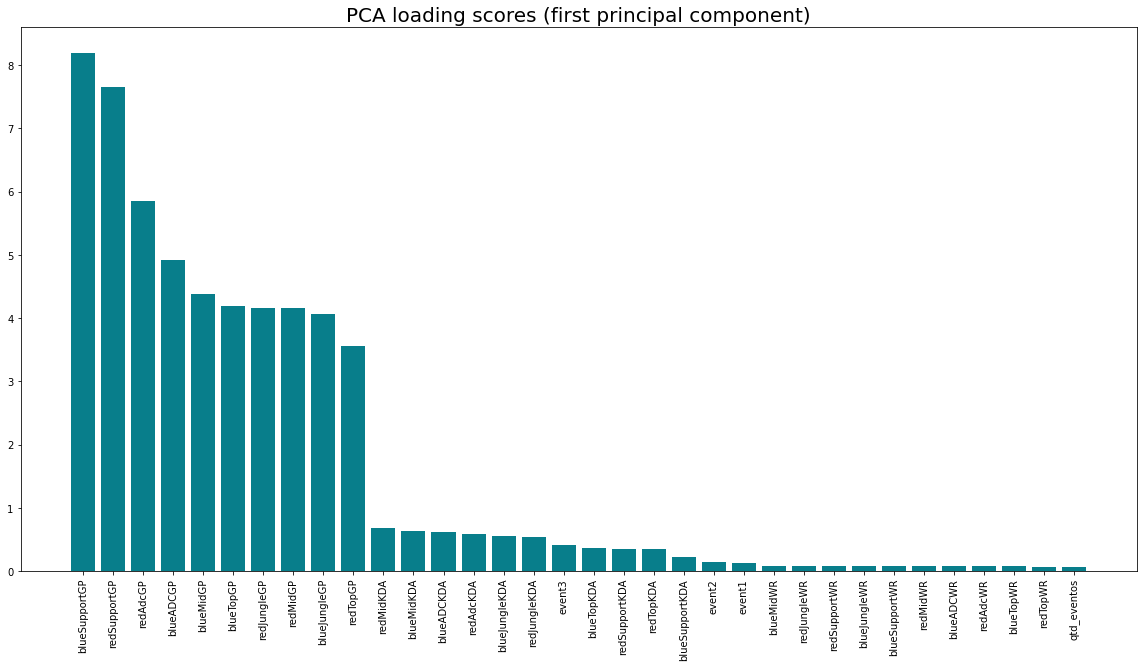

In [14]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [15]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

fig = {
    "data": [
        {
            "x": tsne_results[:, 0],
            "y": tsne_results[:, 1],
            "mode": "markers",
            "marker": {"size": 8, "color": y}
        }
    ],
    "layout": {
        "xaxis": {"title": "x-tsne"},
        "yaxis": {"title": "y-tsne"}
    }
}

py.iplot(fig, filename="test-graph2")

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4008 samples in 0.001s...
[t-SNE] Computed neighbors for 4008 samples in 0.377s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4008
[t-SNE] Computed conditional probabilities for sample 2000 / 4008
[t-SNE] Computed conditional probabilities for sample 3000 / 4008
[t-SNE] Computed conditional probabilities for sample 4000 / 4008
[t-SNE] Computed conditional probabilities for sample 4008 / 4008
[t-SNE] Mean sigma: 7.996220
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.278839
[t-SNE] KL divergence after 300 iterations: 2.150290
